In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### 데이터 가져오기

In [2]:
df = pd.read_csv('data/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
split_count  = int(df.shape[0]* 0.8)
split_count

614

In [5]:
train = df[:split_count].copy()
test = df[split_count:].copy()

In [6]:
feature_names = train.columns[:-1].tolist()
label_name = train.columns[-1:]
print(feature_names,label_name)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] Index(['Outcome'], dtype='object')


In [7]:
X_train = train[feature_names].copy()
X_train.shape

(614, 8)

In [8]:
y_train = train[label_name].copy()
y_train.shape

(614, 1)

In [9]:
# train_data = train.iloc[:,:-1].copy()
# train_label = train.iloc[:,-1].copy()
# test_data = test.iloc[:,:-1].copy()
# test_label = test.iloc[:,-1].copy()
# print(train_data.shape, train_label.shape, test_data.shape, test_label.shape)

In [10]:
X_test = test[feature_names]
y_test = test[label_name]
print(X_test.shape, y_test.shape)

(154, 8) (154, 1)


### 머신러닝 알고리즘 가져오기

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [12]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

### 트리 알고리즘 분석하기

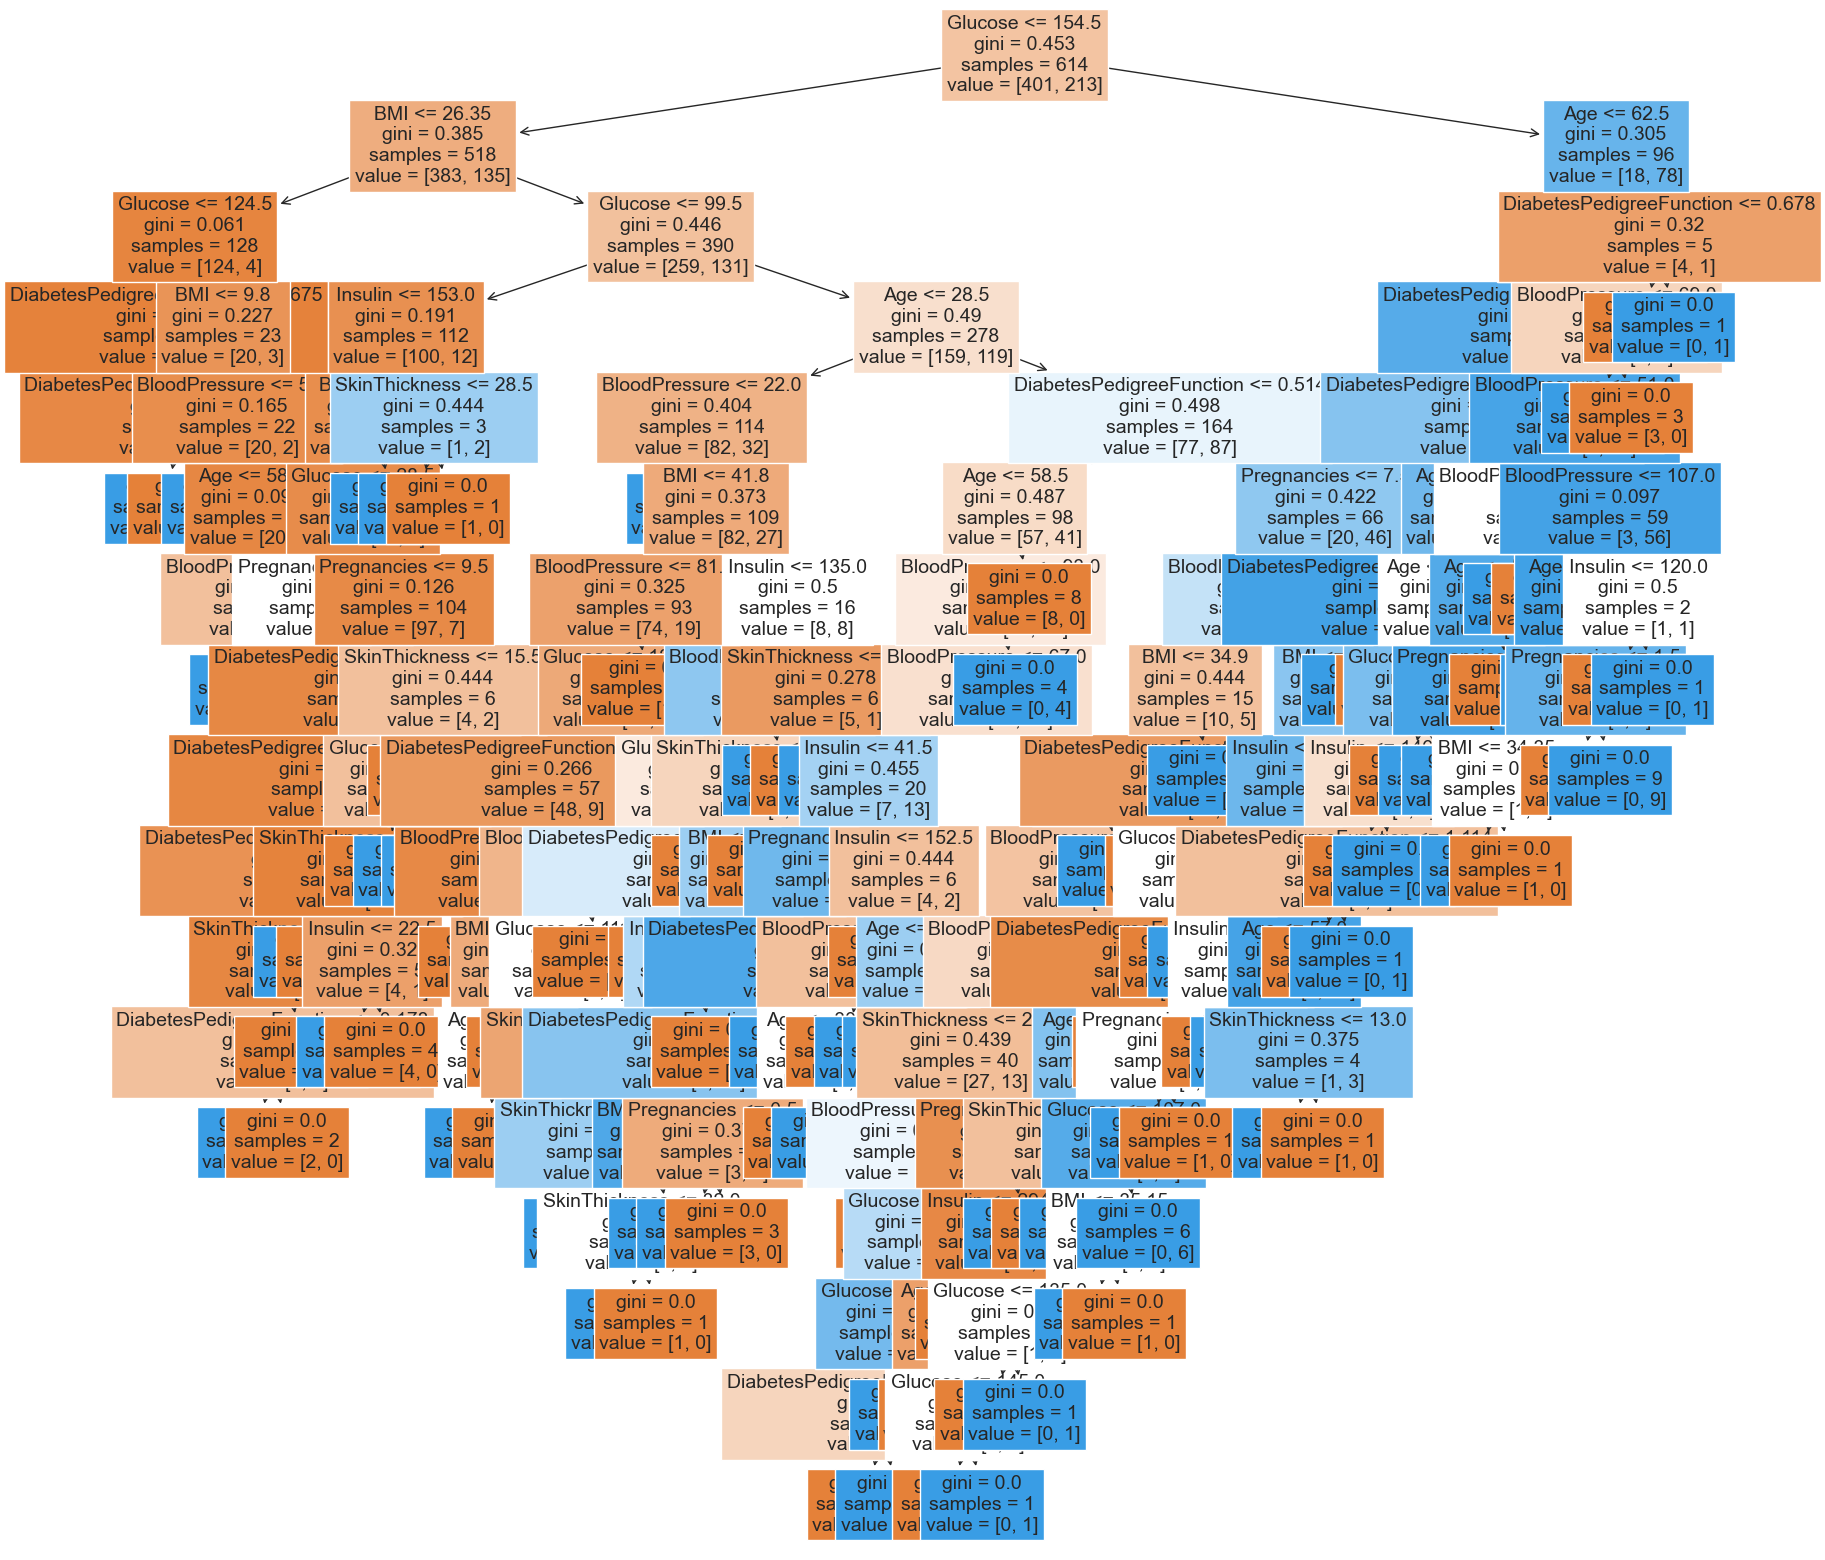

In [14]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=14)

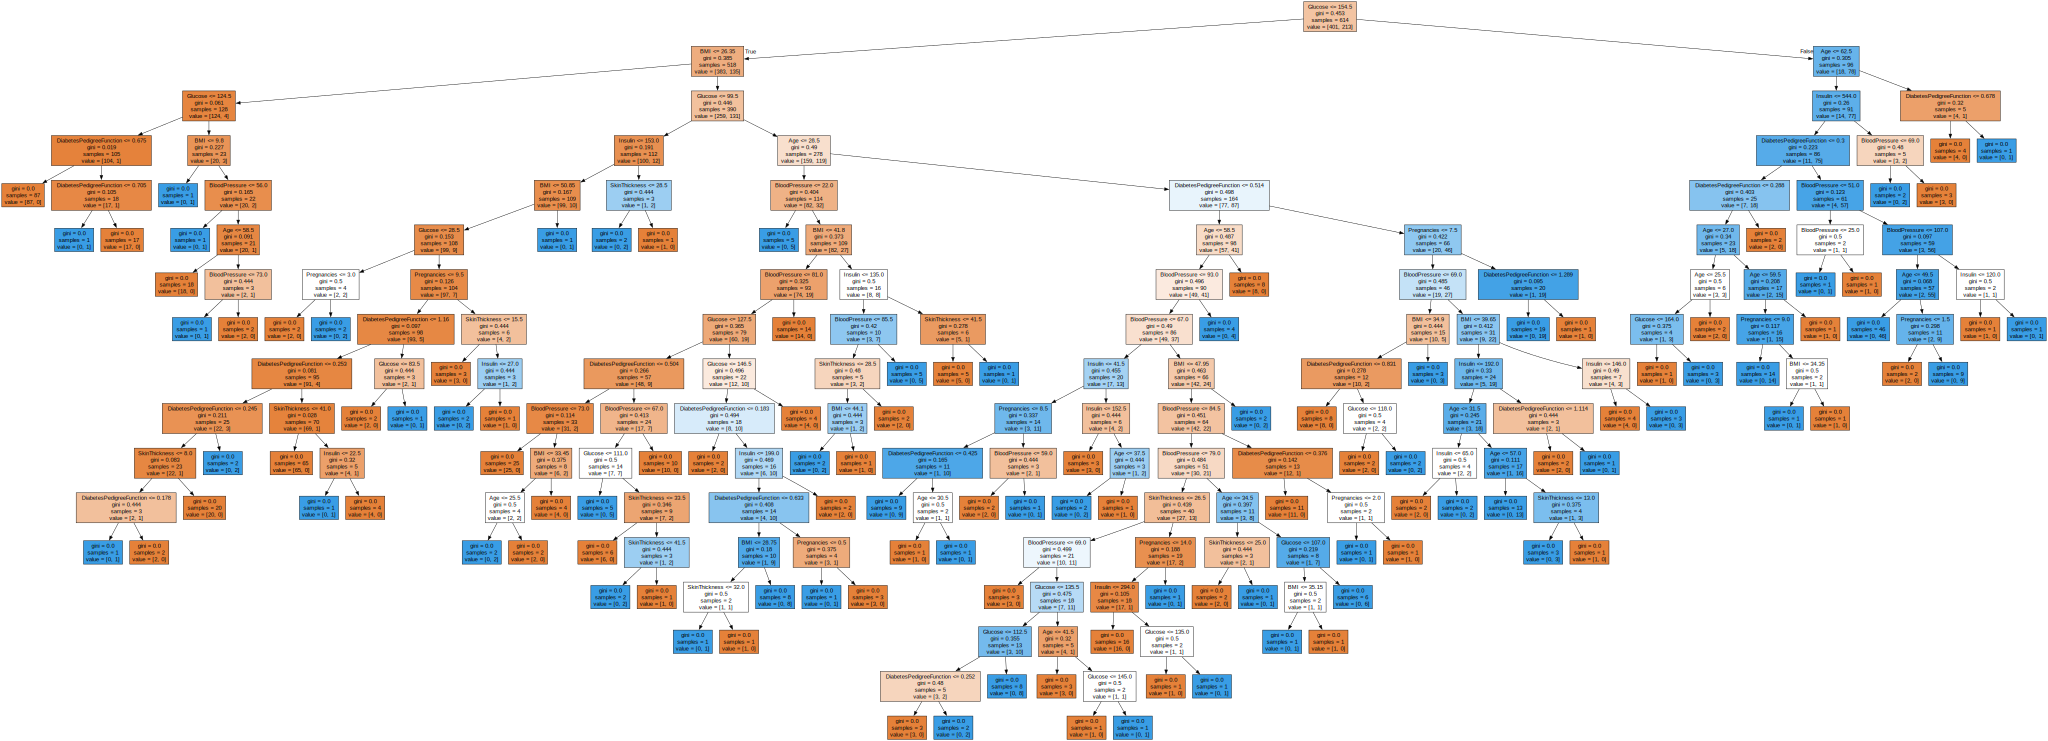

In [15]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model,
                           feature_names=feature_names,
                           filled=True)
graphviz.Source(dot_tree)

In [16]:
# 피쳐 중요도
model.feature_importances_

array([0.05922051, 0.31850806, 0.13145661, 0.06034991, 0.08158725,
       0.12611635, 0.11901129, 0.10375002])

F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categoric

<Axes: >

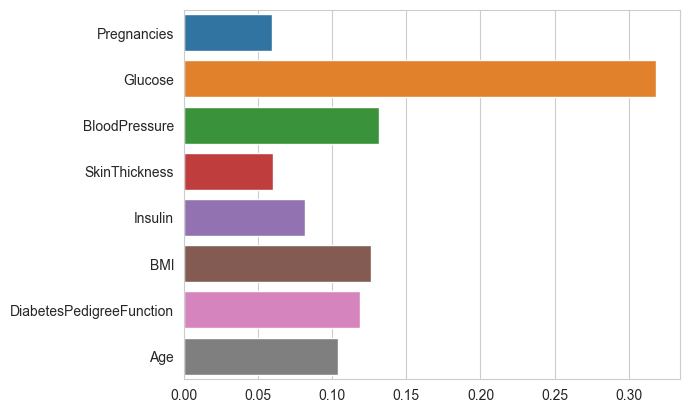

In [17]:
sns.barplot(x=model.feature_importances_, y=feature_names)

### 정확도 측정하기

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)


0.7272727272727273

In [19]:
model.score(X_test, y_test)*100

72.72727272727273